In [94]:
%load_ext autoreload
%autoreload 2
import numpy as np; np.set_printoptions(precision=2, threshold=100); np.random.seed(0)
import torch; torch.set_printoptions(precision=2, threshold=100)
seed = 1 

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12)
import matplotlib   

from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as plt

import seaborn as sns
import time
import sys 
import itertools
import random; random.seed(0)
import datetime
import pickle
import copy
import pandas as pd
import scipy
import os

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import sys
# sys.path.append("../two_module_rnn/code")
# os.chdir('/home/yl4317/Documents/two_module_rnn/code')
from task_new import *
from functions import *
from train_working import *
from model_working import *

# os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.13.1+cu116
3.10.8 (main, Nov 24 2022, 14:13:03) [GCC 11.2.0]


In [62]:
# perf across models
start = time.time()
plt.rc('font', size=18)
perfs_across_models = []

# appendix = '_testdata_noiseless_no_current_matrix'    # for fast-switching models
appendix = '_testdata_noiseless_moreblocks_17in20'    # for slow-switching models

for model_name in sorted(os.listdir('/scratch/yl4317/two_module_rnn/saved_models/')):
    if ('2023-12-22' in model_name) and 'success' in model_name and 'early_stopping' in model_name and '_2_' in model_name:    # for slow-switching models
    # if ('2023-05-10' in model_name) and 'success' in model_name:    # for fast-switching models
        print(model_name)
        path_to_file = '/scratch/yl4317/two_module_rnn/saved_models/' + model_name
        with HiddenPrints():
            model, hp_test, hp_task_test, optim, saved_data = load_model_v2(path_to_file=path_to_file, model_name=model_name, simple=False, plot=False, toprint=False)
        
        # make noiseless
        model.rnn.network_noise = 0
        model.output_noise = 0
        hp_test['input_noise_perceptual'] = 0
        hp_test['input_noise_rule'] = 0
        
        
        if model_name + appendix not in os.listdir('/scratch/yl4317/two_module_rnn/saved_testdata/'):
            print('no test data')
            continue
        with open('/scratch/yl4317/two_module_rnn/saved_testdata/' + model_name + appendix, 'rb') as f:
            neural_data = pickle.load(f)
        perfs = neural_data['test_data']['perfs']
        perf_rules = neural_data['test_data']['perf_rules']
        mean_perf = np.mean([_[0] for _ in perfs])


        # only use for fast-switching models
        # if mean_perf <= 0.8:
        #     print('low perf, pass')
        #     continue

        
        rules = neural_data['test_data']['rules']
        switch_trials = [tr for tr in range(len(rules)-1) if rules[tr]!=rules[tr+1]]
        switch_to_color_trials = [tr for tr in range(len(rules)-1) if rules[tr]=='shape' and rules[tr+1]=='color']
        switch_to_shape_trials = [tr for tr in range(len(rules)-1) if rules[tr]=='color' and rules[tr+1]=='shape']
    
        mean_perf_rule = np.mean([_[0] for _ in perf_rules])
        perfs_across_models.append({'model': model_name, 'mean_perf': mean_perf, 'mean_perf_rule': mean_perf_rule, 'switch_trials': switch_trials, 'switch_to_color_trials': switch_to_color_trials, 'switch_to_shape_trials': switch_to_shape_trials, 'perfs': perfs, 'perf_rules': perf_rules})
print(time.time()-start)

# with open('/home/yl4317/Documents/two_module_rnn/processed_data/perfs_across_slow_switching_models.pickle', 'wb') as handle:
#     pickle.dump(perfs_across_models, handle, protocol=pickle.HIGHEST_PROTOCOL)

success_2023-12-22-16-37-35_wcst_2_early_stopping_correct2
1.4261393547058105


# Figure 1c

In [ ]:
with open('/home/yl4317/Documents/two_module_rnn/processed_data/perfs_across_models.pickle', 'rb') as handle:
    perfs_across_models = pickle.load(handle)

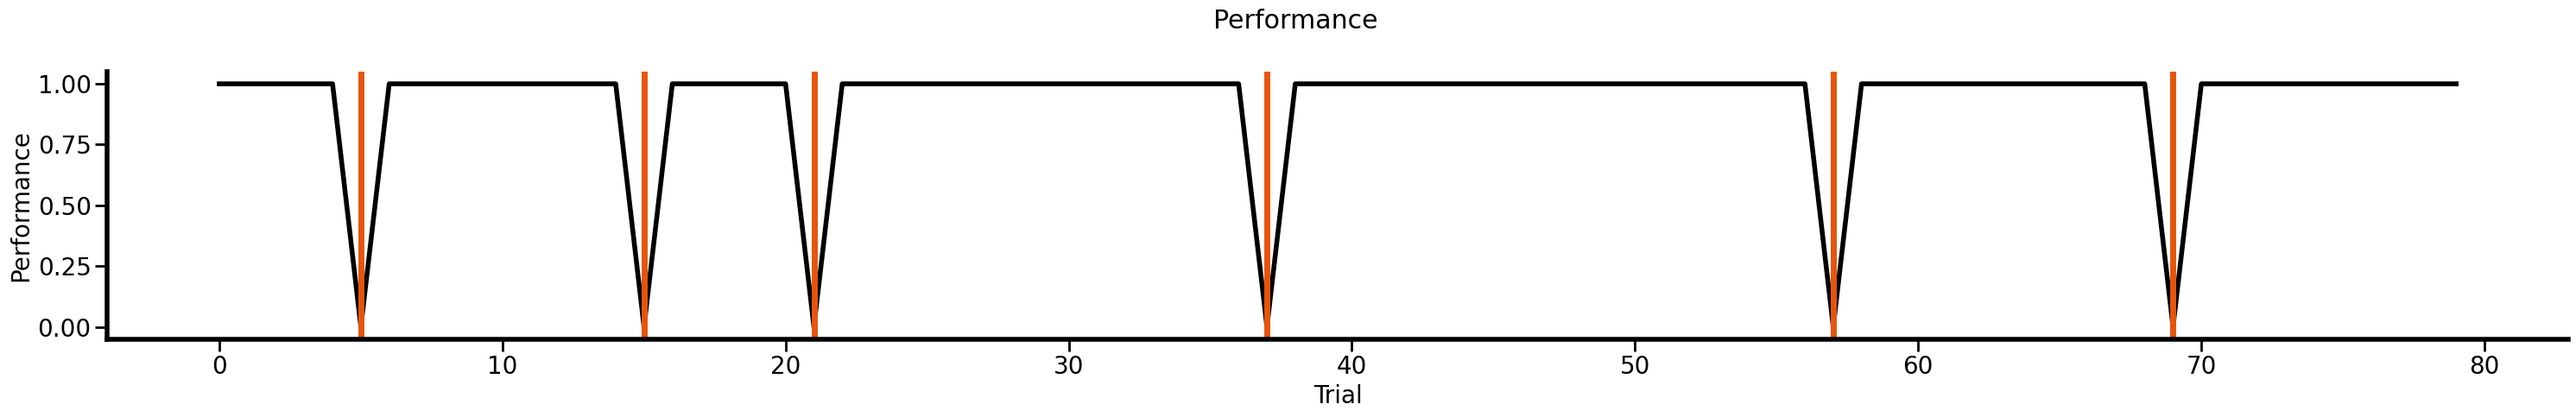

In [78]:
# plot performance as a function of trial number
for data in perfs_across_models:
    if data['model'] != 'success_2023-05-10-14-28-42_wcst_136_sparsity0':    # example network 
        continue
    perfs = [_[0] for _ in data['perfs']]
    # perf_rules = [_[0] for _ in data['perf_rules']]
    switch_trials = data['switch_trials']
    
    fig, ax = plt.subplots(1, 1, figsize=[30, 5])
    fig.suptitle('Performance')
    ax.set_xlabel('Trial', fontsize=20)
    ax.set_ylabel('Performance', fontsize=20)
    ax.plot(perfs, color='k', linewidth=4)
    for tr in switch_trials:
        ax.axvline(x=tr+1, color='#e6550d', linewidth=5)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_fast_switching_model.pdf')
    # pd.DataFrame.from_dict(data={'perf': perfs}, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1c.csv', header=False)

# Figure 1d

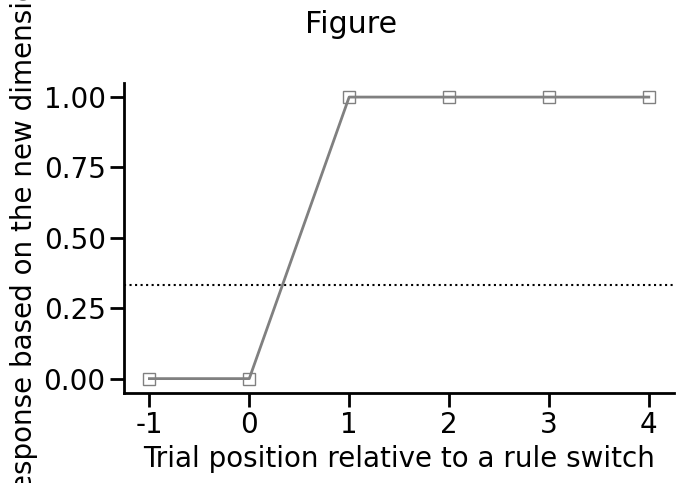

In [87]:
for data in perfs_across_models:
    if data['model'] != 'success_2023-05-10-14-28-42_wcst_136_sparsity0':    # example network 
        continue
    perfs = [_[0] for _ in data['perfs']]
    fig, perf_after_switch = plot_perf_after_switch(switch_trials=data['switch_trials'], perfs=perfs, n_trs_max=6)
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_after_switch_fast_switching_model.pdf')
    # pd.DataFrame.from_dict(data=perf_after_switch, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1d.csv', header=False)

# Figure 1f - performance of the slow switching model

In [88]:
with open('/home/yl4317/Documents/two_module_rnn/processed_data/perfs_across_slow_switching_models.pickle', 'rb') as handle:
    perfs_across_models_slow = pickle.load(handle)

success_2023-12-22-16-37-35_wcst_2_early_stopping_correct2


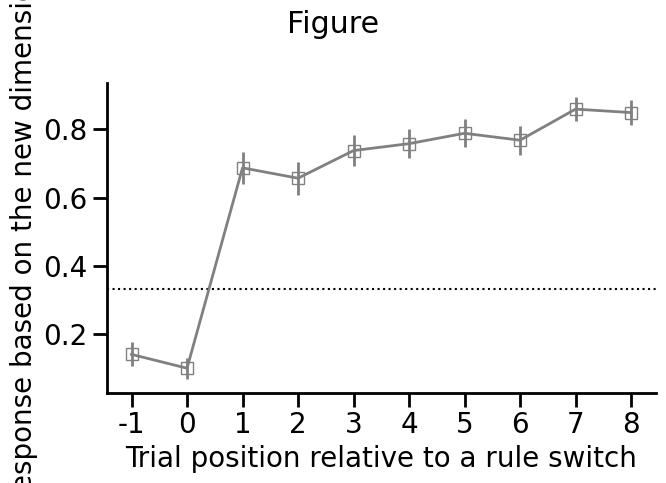

In [91]:
for data in perfs_across_models_slow:
    print(data['model'])
    perfs = [_[0] for _ in data['perfs']]
    fig, perf_after_switch = plot_perf_after_switch(switch_trials=data['switch_trials'], perfs=perfs, n_trs_max=10)
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_after_switch_slow_switching_model.pdf')
    # pd.DataFrame.from_dict(data=perf_after_switch, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1f.csv', header=False)